In [2]:
# -*- coding: utf-8 -*-
#逻辑回归 自动建模
import pandas as pd
import os,sys

In [18]:
#参数初始化
o =os.getcwd()
filename = o+"\\bankloan.xls"
data = pd.read_excel(filename)
data.head()

,年龄,教育,工龄,地址,收入,负债率,信用卡负债,其他负债,违约
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


In [4]:
x = data.iloc[:,:8].as_matrix() #前8行作为自变量
y = data.iloc[:,8].as_matrix()#最后一行最为因变量

# 随机逻辑回归

In [5]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.linear_model import RandomizedLogisticRegression as RLR 

## 建立随机逻辑回归模型，筛选变量

In [6]:
rlr = RLR() #建立随机逻辑回归模型，筛选变量
rlr.fit(x, y) #训练模型
rlr.get_support() #获取特征筛选结果，也可以通过.scores_方法获取各个特征的分数
print(u'通过随机逻辑回归模型筛选特征结束。')
# print(u'有效特征为：%s' % ','.join(data.columns[rlr.get_support()]))

print(u'有效特征为：%s' % ','.join(data.iloc[:,:8].columns[rlr.get_support()]))

通过随机逻辑回归模型筛选特征结束。
有效特征为：工龄,地址,负债率,信用卡负债


d:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedLogisticRegression is deprecated; The class RandomizedLogisticRegression is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


In [7]:
x = data[data.iloc[:,:8].columns[rlr.get_support()]].as_matrix() #筛选好特征
x

array([[17.      , 12.      ,  9.3     , 11.359392],
       [10.      ,  6.      , 17.3     ,  1.362202],
       [15.      , 14.      ,  5.5     ,  0.856075],
       ...,
       [15.      ,  3.      ,  7.6     ,  0.491264],
       [19.      , 22.      ,  8.4     ,  2.302608],
       [12.      , 14.      , 14.7     ,  2.994684]])

## 建立逻辑回归模型

In [8]:
lr = LR() #建立逻辑回归模型
lr.fit(x, y) #用筛选后的特征数据来训练模型
print(u'逻辑回归模型训练结束。')
print(u'模型的平均正确率为：%s' % lr.score(x, y)) #给出模型的平均正确率，本例为81.4%

逻辑回归模型训练结束。
模型的平均正确率为：0.8142857142857143


# 非线性回归

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
x=pd.DataFrame([1.5,2.8,4.5,7.5,10.5,13.5,15.1,16.5,19.5,22.5,24.5,26.5])
y=pd.DataFrame([7.0,5.5,4.6,3.6,2.9,2.7,2.5,2.4,2.2,2.1,1.9,1.8])

In [5]:
x

,0
0,1.5
1,2.8
2,4.5
3,7.5
4,10.5
5,13.5
6,15.1
7,16.5
8,19.5
9,22.5


Coefficients: 
 [[-0.17002988]]
MSE: 0.4942186278002408
Variance score: 0.80


d:\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


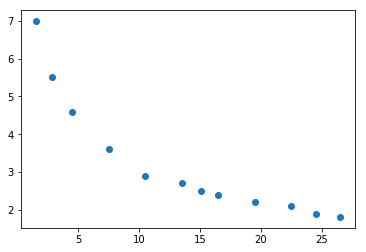

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x,y)
fig.show()

from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(x,y)

# The coefficients
print('Coefficients: \n', linreg.coef_)

y_pred = linreg.predict(x)
# The mean square error
print ("MSE:",metrics.mean_squared_error(y,y_pred))

# Explained variance score: 1 is perfect prediction
print ('Variance score: %.2f' % linreg.score(x, y))

# 多项式模型

In [11]:
x1=x
x2=x**2
x1['x2']=x2

In [12]:
x1

,0,x2
0,1.5,2.25
1,2.8,7.84
2,4.5,20.25
3,7.5,56.25
4,10.5,110.25
5,13.5,182.25
6,15.1,228.01
7,16.5,272.25
8,19.5,380.25
9,22.5,506.25


In [13]:
linreg = LinearRegression()
linreg.fit(x1,y)

# The coefficients
print('Coefficients: \n', linreg.coef_)

y_pred = linreg.predict(x)
# The mean square error
print ("MSE:",metrics.mean_squared_error(y,y_pred))

Coefficients: 
 [[-0.4656313   0.01075704]]
MSE: 0.11811957095094366


# 对数模型

In [14]:
x2=pd.DataFrame(np.log(x[0]))

linreg = LinearRegression()
linreg.fit(x2,y)

# The coefficients
print('Coefficients: \n', linreg.coef_)

y_pred = linreg.predict(x2)
# The mean square error
print ("MSE:",metrics.mean_squared_error(y,y_pred))

Coefficients: 
 [[-1.75683848]]
MSE: 0.035512357185799176


# 指数

In [16]:
y2=pd.DataFrame(np.log(y))

linreg = LinearRegression()
linreg.fit(pd.DataFrame(x[0]),y2)

# The coefficients
print('Coefficients: \n', linreg.coef_)

y_pred = linreg.predict(pd.DataFrame(x[0]))
# The mean square error
print ("MSE:",metrics.mean_squared_error(y2,y_pred))

Coefficients: 
 [[-0.04880874]]
MSE: 0.014748419886149782


# 幂函数

In [17]:
linreg = LinearRegression()
linreg.fit(x2,y2)

# The coefficients
print('Coefficients: \n', linreg.coef_)

y_pred = linreg.predict(x2)
# The mean square error
print ("MSE:",metrics.mean_squared_error(y2,y_pred))

Coefficients: 
 [[-0.47242789]]
MSE: 0.0010862101591600077
